In [1]:
import torch
import pandas as pd
import pennylane as qml
from pennylane import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from data_utils import mnist_preparation 
from evaluationUtils import calculate_mcm_accuracy
from tqdm import tqdm
import matplotlib as plt
from OriginalModel import FullQuantumModel, QuantumCircuit
from prova import MCMQuantumModel, MCMCircuit
from pennylane import Device
from pennylane.measurements import StateMP
from torch.nn import Module, ParameterDict
import matplotlib.pyplot as plt
import warnings
from typing import Optional, Dict, List, Any
from torch.utils.data import DataLoader, dataloader
from time import time
import math
from pennylane.measurements import MidMeasureMP
torch.manual_seed(1234)

In [2]:
labels = [0,1,2,3]
# Download MNIST and prepare transforms
mnist = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.Compose([
                                transforms.Resize((16, 16)),  # Resize to 16x16
                                transforms.ToTensor(),
                                #transforms.Lambda(lambda img: add_salt_and_pepper_noise(img, salt_prob=0.1, pepper_prob=0.1)),
                                transforms.Normalize((0.1307,), (0.3081,))  # Normalize
                             ]))
#train/vali/test 70/15/15 split, see data_utils.py for further details
train_dataloader, validation_dataloader, test_dataloader = mnist_preparation(dataset=mnist, labels = labels, train_test_ratio=0.7,batch_size=64, vali_test_ratio=0.5)

print("Images in the training set: ", len(train_dataloader.dataset), "\n Images in the validation set: ", len(validation_dataloader.dataset), "\n Images in the test set: ", len(test_dataloader.dataset))

Images in the training set:  17327 
 Images in the validation set:  3713 
 Images in the test set:  3714


In [20]:
 modello = MCMQuantumModel(qubits=8, layers=8, ansatz='ansatz_1')

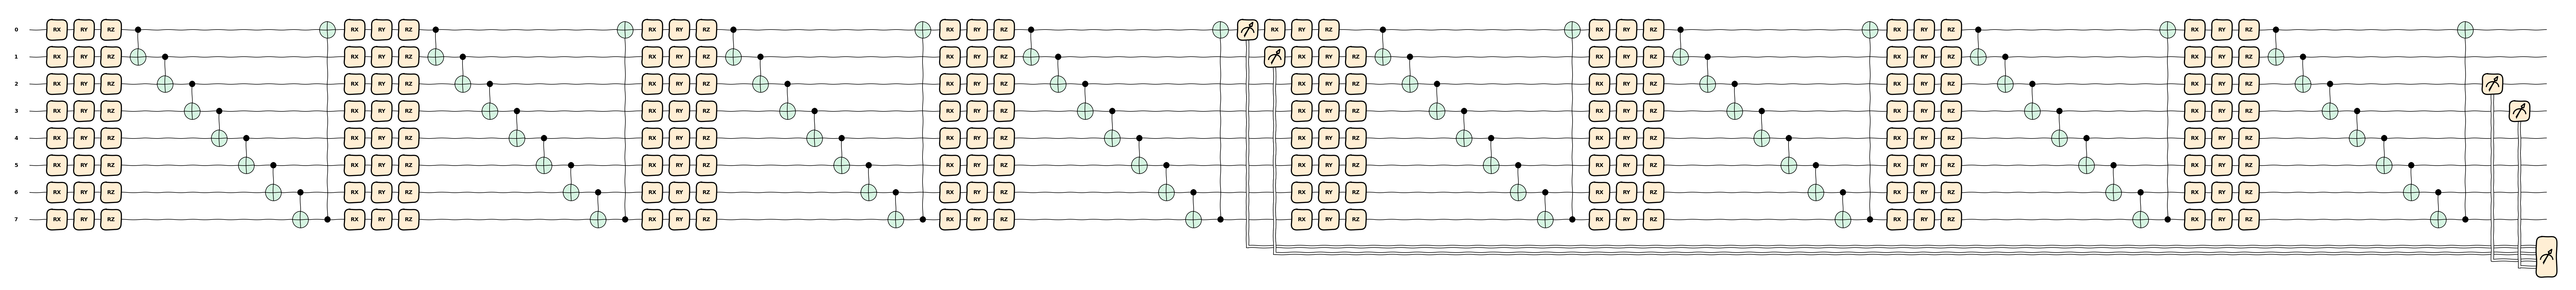

In [21]:
modello.draw(style='sketch')

Epoch 1/50: 100%|██████████| 270/270 [01:40<00:00,  2.69it/s, fm_accuracy=0.969, loss=0.941]


Time per epoch (s):  100.32026791572571
Epoch:  1 Loss:  1.0630743600704051
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8836226851851852
--------------------------------------------------------------------------


Epoch 2/50: 100%|██████████| 270/270 [01:38<00:00,  2.75it/s, fm_accuracy=0.953, loss=0.935]


Time per epoch (s):  98.29866075515747
Epoch:  2 Loss:  0.9582223139427326
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9053819444444444
--------------------------------------------------------------------------


Epoch 3/50: 100%|██████████| 270/270 [01:38<00:00,  2.73it/s, fm_accuracy=0.875, loss=0.959]


Time per epoch (s):  98.97368097305298
Epoch:  3 Loss:  0.9482680439949036
--------------------------------------------------------------------------
Final Measurement accuracy:  0.8975694444444444
--------------------------------------------------------------------------


Epoch 4/50: 100%|██████████| 270/270 [01:39<00:00,  2.72it/s, fm_accuracy=0.922, loss=0.918]


Time per epoch (s):  99.20350313186646
Epoch:  4 Loss:  0.9404237996648859
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9058449074074074
--------------------------------------------------------------------------


Epoch 5/50: 100%|██████████| 270/270 [01:39<00:00,  2.72it/s, fm_accuracy=0.969, loss=0.866]


Time per epoch (s):  99.21434879302979
Epoch:  5 Loss:  0.9328480162002423
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9231481481481482
--------------------------------------------------------------------------


Epoch 6/50: 100%|██████████| 270/270 [01:40<00:00,  2.69it/s, fm_accuracy=0.938, loss=0.943]


Time per epoch (s):  100.42029690742493
Epoch:  6 Loss:  0.9301453925945141
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9288194444444444
--------------------------------------------------------------------------


Epoch 7/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.938, loss=0.92] 


Time per epoch (s):  97.09324479103088
Epoch:  7 Loss:  0.9301840329611742
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9284722222222223
--------------------------------------------------------------------------


Epoch 8/50: 100%|██████████| 270/270 [01:36<00:00,  2.78it/s, fm_accuracy=0.953, loss=0.933]


Time per epoch (s):  96.95553302764893
Epoch:  8 Loss:  0.9301715976662106
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9292824074074074
--------------------------------------------------------------------------


Epoch 9/50: 100%|██████████| 270/270 [01:34<00:00,  2.85it/s, fm_accuracy=0.953, loss=0.919]


Time per epoch (s):  94.58799695968628
Epoch:  9 Loss:  0.9301731182469262
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9288773148148148
--------------------------------------------------------------------------


Epoch 10/50: 100%|██████████| 270/270 [01:37<00:00,  2.77it/s, fm_accuracy=0.938, loss=0.895]


Time per epoch (s):  97.32685494422913
Epoch:  10 Loss:  0.930138478897236
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9289351851851851
--------------------------------------------------------------------------


Epoch 11/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.938, loss=0.94] 


Time per epoch (s):  97.25890302658081
Epoch:  11 Loss:  0.9282261744693473
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9311342592592593
--------------------------------------------------------------------------


Epoch 12/50: 100%|██████████| 270/270 [01:37<00:00,  2.77it/s, fm_accuracy=0.969, loss=0.888]


Time per epoch (s):  97.31807780265808
Epoch:  12 Loss:  0.9280693347807284
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9315972222222222
--------------------------------------------------------------------------


Epoch 13/50: 100%|██████████| 270/270 [01:36<00:00,  2.78it/s, fm_accuracy=0.938, loss=0.911]


Time per epoch (s):  96.98700523376465
Epoch:  13 Loss:  0.9280789929407615
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9308449074074074
--------------------------------------------------------------------------


Epoch 14/50: 100%|██████████| 270/270 [01:36<00:00,  2.79it/s, fm_accuracy=0.938, loss=0.956]


Time per epoch (s):  96.84816193580627
Epoch:  14 Loss:  0.9281366648497404
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9313657407407407
--------------------------------------------------------------------------


Epoch 15/50: 100%|██████████| 270/270 [01:36<00:00,  2.80it/s, fm_accuracy=1, loss=0.869]    


Time per epoch (s):  96.47205710411072
Epoch:  15 Loss:  0.9281095919785676
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9302662037037037
--------------------------------------------------------------------------


Epoch 16/50: 100%|██████████| 270/270 [01:36<00:00,  2.78it/s, fm_accuracy=0.906, loss=0.937]


Time per epoch (s):  96.96504211425781
Epoch:  16 Loss:  0.9279911595362204
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9304976851851852
--------------------------------------------------------------------------


Epoch 17/50: 100%|██████████| 270/270 [01:36<00:00,  2.80it/s, fm_accuracy=0.891, loss=0.959]


Time per epoch (s):  96.37418580055237
Epoch:  17 Loss:  0.9280877927939097
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9307291666666667
--------------------------------------------------------------------------


Epoch 18/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.938, loss=0.921]


Time per epoch (s):  97.22197675704956
Epoch:  18 Loss:  0.9281449055230176
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9315393518518519
--------------------------------------------------------------------------


Epoch 19/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.953, loss=0.941]


Time per epoch (s):  97.0821270942688
Epoch:  19 Loss:  0.9282235097002101
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9306134259259259
--------------------------------------------------------------------------


Epoch 20/50: 100%|██████████| 270/270 [01:37<00:00,  2.76it/s, fm_accuracy=0.906, loss=0.953]


Time per epoch (s):  97.6818540096283
Epoch:  20 Loss:  0.9280766595292974
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9309027777777777
--------------------------------------------------------------------------


Epoch 21/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.922, loss=0.933]


Time per epoch (s):  97.22302794456482
Epoch:  21 Loss:  0.9281822120701825
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9309606481481482
--------------------------------------------------------------------------


Epoch 22/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.953, loss=0.897]


Time per epoch (s):  97.25521302223206
Epoch:  22 Loss:  0.9280061472345281
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9313078703703703
--------------------------------------------------------------------------


Epoch 23/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.953, loss=0.905]


Time per epoch (s):  97.21249294281006
Epoch:  23 Loss:  0.9281855894459619
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9310185185185185
--------------------------------------------------------------------------


Epoch 24/50: 100%|██████████| 270/270 [01:37<00:00,  2.78it/s, fm_accuracy=0.891, loss=0.972]


Time per epoch (s):  97.15646696090698
Epoch:  24 Loss:  0.9281158403114036
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9307291666666667
--------------------------------------------------------------------------


Epoch 25/50: 100%|██████████| 270/270 [01:36<00:00,  2.79it/s, fm_accuracy=0.938, loss=0.933]


Time per epoch (s):  96.88892698287964
Epoch:  25 Loss:  0.9280144545767043
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9313078703703703
--------------------------------------------------------------------------


Epoch 26/50: 100%|██████████| 270/270 [01:37<00:00,  2.76it/s, fm_accuracy=0.922, loss=0.957]


Time per epoch (s):  97.70162320137024
Epoch:  26 Loss:  0.9280392185405448
--------------------------------------------------------------------------
Final Measurement accuracy:  0.930787037037037
--------------------------------------------------------------------------


Epoch 27/50: 100%|██████████| 270/270 [01:37<00:00,  2.76it/s, fm_accuracy=0.953, loss=0.906]


Time per epoch (s):  97.78615880012512
Epoch:  27 Loss:  0.9280903891280845
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9303819444444444
--------------------------------------------------------------------------


Epoch 28/50: 100%|██████████| 270/270 [01:38<00:00,  2.75it/s, fm_accuracy=0.922, loss=0.947]


Time per epoch (s):  98.15235710144043
Epoch:  28 Loss:  0.9281399331710957
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9311342592592593
--------------------------------------------------------------------------


Epoch 29/50: 100%|██████████| 270/270 [01:37<00:00,  2.76it/s, fm_accuracy=0.797, loss=0.977]


Time per epoch (s):  97.75537586212158
Epoch:  29 Loss:  0.9281502500728325
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9306134259259259
--------------------------------------------------------------------------


Epoch 30/50: 100%|██████████| 270/270 [01:37<00:00,  2.76it/s, fm_accuracy=0.938, loss=0.921]


Time per epoch (s):  97.80010509490967
Epoch:  30 Loss:  0.9280660042056331
--------------------------------------------------------------------------
Final Measurement accuracy:  0.930324074074074
--------------------------------------------------------------------------


Epoch 31/50: 100%|██████████| 270/270 [01:40<00:00,  2.68it/s, fm_accuracy=0.922, loss=0.905]


Time per epoch (s):  100.91122198104858
Epoch:  31 Loss:  0.9282276738573003
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9310185185185185
--------------------------------------------------------------------------


Epoch 32/50: 100%|██████████| 270/270 [01:40<00:00,  2.69it/s, fm_accuracy=0.906, loss=0.916]


Time per epoch (s):  100.49984788894653
Epoch:  32 Loss:  0.9281032760938008
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9302083333333333
--------------------------------------------------------------------------


Epoch 33/50: 100%|██████████| 270/270 [01:36<00:00,  2.79it/s, fm_accuracy=0.859, loss=0.946]


Time per epoch (s):  96.61872410774231
Epoch:  33 Loss:  0.9281105471981896
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9307291666666667
--------------------------------------------------------------------------


Epoch 34/50: 100%|██████████| 270/270 [01:36<00:00,  2.79it/s, fm_accuracy=0.969, loss=0.936]


Time per epoch (s):  96.7711718082428
Epoch:  34 Loss:  0.9280100321328199
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9310763888888889
--------------------------------------------------------------------------


Epoch 35/50: 100%|██████████| 270/270 [01:37<00:00,  2.77it/s, fm_accuracy=0.922, loss=0.923]


Time per epoch (s):  97.60098528862
Epoch:  35 Loss:  0.9280888413941418
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9314814814814815
--------------------------------------------------------------------------


Epoch 36/50: 100%|██████████| 270/270 [01:38<00:00,  2.75it/s, fm_accuracy=0.906, loss=0.904]


Time per epoch (s):  98.05656790733337
Epoch:  36 Loss:  0.9280570688071075
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9302662037037037
--------------------------------------------------------------------------


Epoch 37/50: 100%|██████████| 270/270 [01:38<00:00,  2.75it/s, fm_accuracy=0.922, loss=0.902]


Time per epoch (s):  98.3054130077362
Epoch:  37 Loss:  0.9281355427371131
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9304976851851852
--------------------------------------------------------------------------


Epoch 38/50: 100%|██████████| 270/270 [01:38<00:00,  2.73it/s, fm_accuracy=0.922, loss=0.928]


Time per epoch (s):  98.76693725585938
Epoch:  38 Loss:  0.9280462470319536
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9309027777777777
--------------------------------------------------------------------------


Epoch 39/50: 100%|██████████| 270/270 [01:39<00:00,  2.72it/s, fm_accuracy=0.922, loss=0.913]


Time per epoch (s):  99.1841299533844
Epoch:  39 Loss:  0.9281448320106224
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9307291666666667
--------------------------------------------------------------------------


Epoch 40/50: 100%|██████████| 270/270 [01:39<00:00,  2.72it/s, fm_accuracy=0.875, loss=0.961]


Time per epoch (s):  99.43870115280151
Epoch:  40 Loss:  0.9280802055641457
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9309027777777777
--------------------------------------------------------------------------


Epoch 41/50: 100%|██████████| 270/270 [01:39<00:00,  2.73it/s, fm_accuracy=0.984, loss=0.898]


Time per epoch (s):  99.02147483825684
Epoch:  41 Loss:  0.928063056204054
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9308449074074074
--------------------------------------------------------------------------


Epoch 42/50: 100%|██████████| 270/270 [01:38<00:00,  2.75it/s, fm_accuracy=0.969, loss=0.904]


Time per epoch (s):  98.29967284202576
Epoch:  42 Loss:  0.928142640767274
--------------------------------------------------------------------------
Final Measurement accuracy:  0.930150462962963
--------------------------------------------------------------------------


Epoch 43/50: 100%|██████████| 270/270 [01:38<00:00,  2.74it/s, fm_accuracy=0.969, loss=0.897]


Time per epoch (s):  98.68702816963196
Epoch:  43 Loss:  0.9281424237622156
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9311342592592593
--------------------------------------------------------------------------


Epoch 44/50: 100%|██████████| 270/270 [01:35<00:00,  2.82it/s, fm_accuracy=0.969, loss=0.927]


Time per epoch (s):  95.75043106079102
Epoch:  44 Loss:  0.9280913606837944
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9314236111111112
--------------------------------------------------------------------------


Epoch 45/50: 100%|██████████| 270/270 [01:35<00:00,  2.82it/s, fm_accuracy=0.984, loss=0.883]


Time per epoch (s):  95.69661712646484
Epoch:  45 Loss:  0.9281517309171182
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9300347222222223
--------------------------------------------------------------------------


Epoch 46/50: 100%|██████████| 270/270 [01:35<00:00,  2.83it/s, fm_accuracy=0.891, loss=0.944]


Time per epoch (s):  95.42163395881653
Epoch:  46 Loss:  0.9281547639105056
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9311342592592593
--------------------------------------------------------------------------


Epoch 47/50: 100%|██████████| 270/270 [01:35<00:00,  2.83it/s, fm_accuracy=0.938, loss=0.917]


Time per epoch (s):  95.47687292098999
Epoch:  47 Loss:  0.9281011972162458
--------------------------------------------------------------------------
Final Measurement accuracy:  0.930324074074074
--------------------------------------------------------------------------


Epoch 48/50: 100%|██████████| 270/270 [01:38<00:00,  2.73it/s, fm_accuracy=0.844, loss=0.949]


Time per epoch (s):  98.73414206504822
Epoch:  48 Loss:  0.928142339653439
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9308449074074074
--------------------------------------------------------------------------


Epoch 49/50: 100%|██████████| 270/270 [01:39<00:00,  2.72it/s, fm_accuracy=0.938, loss=0.946]


Time per epoch (s):  99.2239122390747
Epoch:  49 Loss:  0.9281247699702228
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9300925925925926
--------------------------------------------------------------------------


Epoch 50/50: 100%|██████████| 270/270 [01:38<00:00,  2.73it/s, fm_accuracy=0.969, loss=0.933]


Time per epoch (s):  98.94798278808594
Epoch:  50 Loss:  0.9280771595460398
--------------------------------------------------------------------------
Final Measurement accuracy:  0.9306134259259259
--------------------------------------------------------------------------


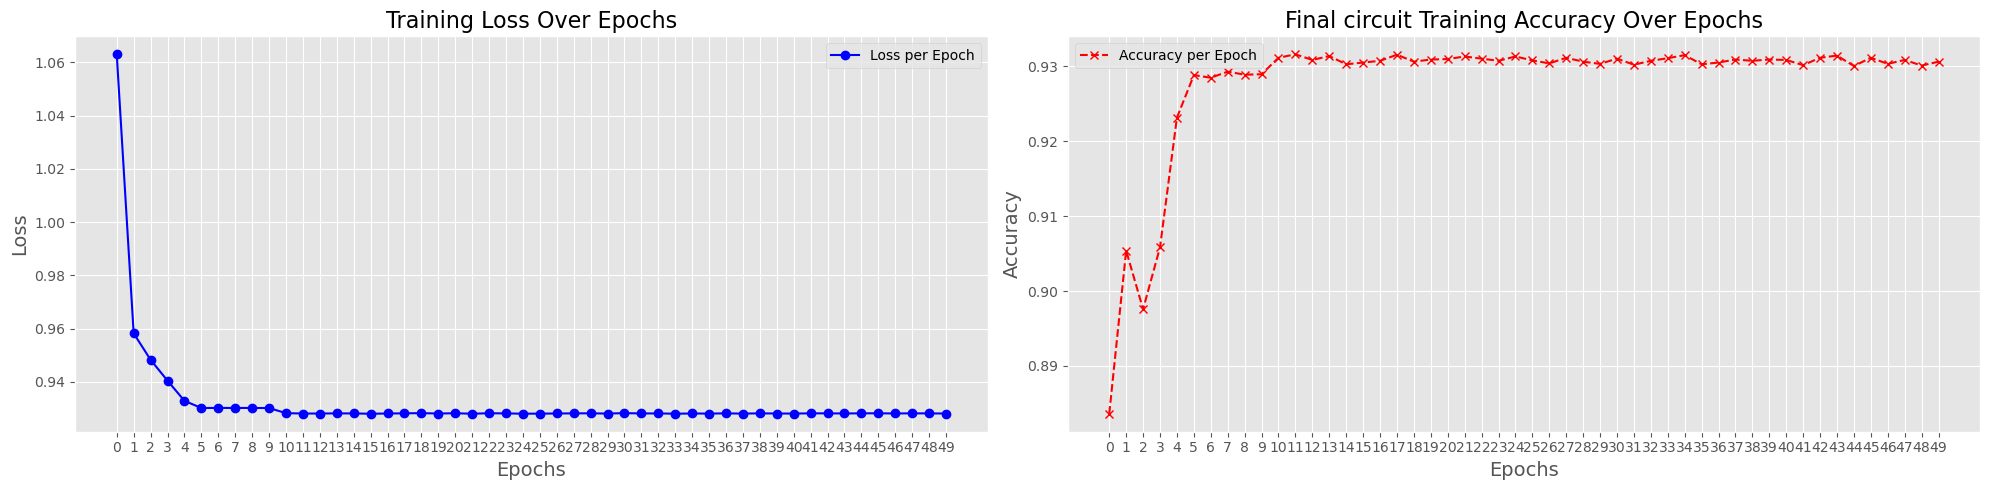

([0.8836226851851852,
  0.9053819444444444,
  0.8975694444444444,
  0.9058449074074074,
  0.9231481481481482,
  0.9288194444444444,
  0.9284722222222223,
  0.9292824074074074,
  0.9288773148148148,
  0.9289351851851851,
  0.9311342592592593,
  0.9315972222222222,
  0.9308449074074074,
  0.9313657407407407,
  0.9302662037037037,
  0.9304976851851852,
  0.9307291666666667,
  0.9315393518518519,
  0.9306134259259259,
  0.9309027777777777,
  0.9309606481481482,
  0.9313078703703703,
  0.9310185185185185,
  0.9307291666666667,
  0.9313078703703703,
  0.930787037037037,
  0.9303819444444444,
  0.9311342592592593,
  0.9306134259259259,
  0.930324074074074,
  0.9310185185185185,
  0.9302083333333333,
  0.9307291666666667,
  0.9310763888888889,
  0.9314814814814815,
  0.9302662037037037,
  0.9304976851851852,
  0.9309027777777777,
  0.9307291666666667,
  0.9309027777777777,
  0.9308449074074074,
  0.930150462962963,
  0.9311342592592593,
  0.9314236111111112,
  0.9300347222222223,
  0.931134259

In [22]:
modello.fit(dataloader=train_dataloader, sched_epochs=10, learning_rate=[0.01, 0.001], epochs= 50,
            show_plot=True)

In [26]:
result = []
for i, (img, label) in tqdm(enumerate(test_dataloader.dataset)):
    img = img.type(torch.float64)
    img = img / torch.linalg.norm(img).view(-1, 1) 
    probs = modello.forward(img)[1]
    prediction = torch.argmax(probs)
    result.append((prediction, label))
     
def calculate_accuracy(data):
    correct = sum([1 for label, prediction in data if label == prediction])
    return correct, correct / len(data)

test_results = calculate_accuracy(result)

print(test_results[0], "elements have been correctly classified probability", p, "with an accuracy of ", test_results[1])

3714it [01:28, 41.73it/s]

3448 elements have been correctly classified probability 0.12 with an accuracy of  0.9283791060850834


In [29]:
a =modello.params

import pickle

with open('/Users/jackvittori/Desktop/collassemasololossfinale.pkl', 'wb') as file:
    pickle.dump(a, file)